In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
(_, _), (x_test, y_test) = mnist.load_data()

# indices of 100 random MNIST examples
rand_indices = np.load("invariance_examples/indexs.npy")
assert len(rand_indices) == 100

# original examples
x_test_r = x_test[rand_indices]
y_test_r = y_test[rand_indices]
x_test_r = x_test_r.reshape(x_test_r.shape[0], 28, 28)
x_test_r = x_test_r.astype('float32')
x_test_r /= 255

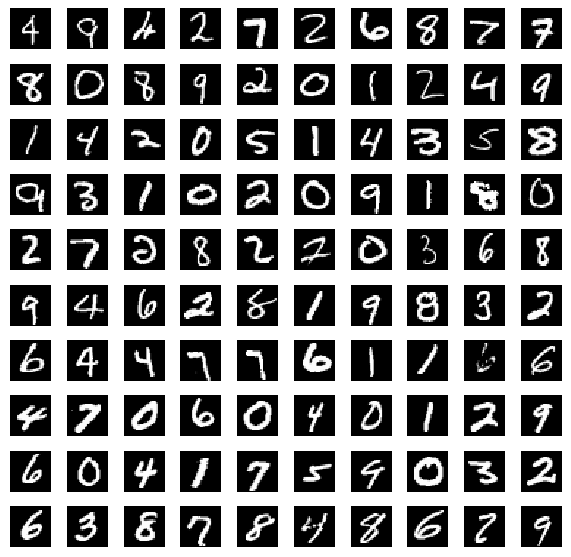

In [4]:
# plot the original examples

_, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    temp = np.ones((32, 32, 3), dtype=np.float32)
    temp[2:-2, 2:-2, 0] = x_test_r[i]
    temp[2:-2, 2:-2, 1] = x_test_r[i]
    temp[2:-2, 2:-2, 2] = x_test_r[i]
    ax[i//10, i%10].imshow(temp)
    ax[i//10, i%10].axis('off')

plt.show()

Attack success rate on humans: 21.0%
Max distortion:  0.3


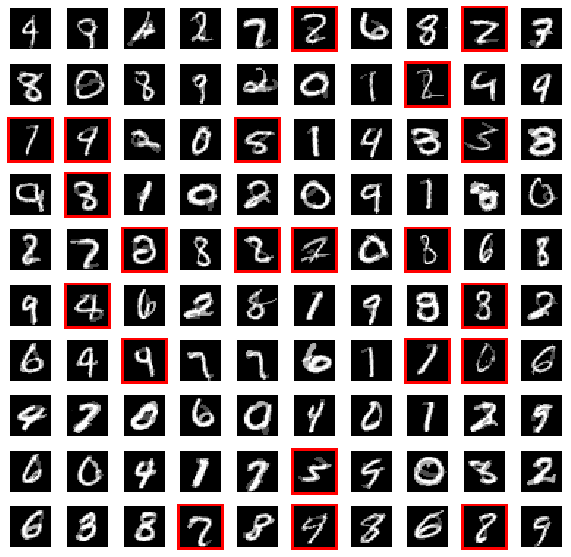

In [5]:
# get the invariance examples from the automated linf attack with epsilon=0.3

# the invariance examples and the human-assigned labels
adv_03 = np.load('invariance_examples/linf/automated_eps03.npy').astype(np.float32) / 255.0
labels_h_03 = np.load('invariance_examples/linf/automated_eps03_labels.npy')

# the original test labels
labels_03 = y_test_r

labels_03 = np.asarray(labels_03)
labels_h_03 = np.asarray(labels_h_03)
print("Attack success rate on humans: {:.1f}%".format(np.mean(labels_03 != labels_h_03) * 100))
print("Max distortion: ", np.max(np.abs(adv_03 - x_test_r)))

_, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    temp = 255*np.ones((32, 32, 3), dtype=np.float32)
    temp[2:-2, 2:-2, 0] = adv_03[i] * 255
    temp[2:-2, 2:-2, 1] = adv_03[i] * 255
    temp[2:-2, 2:-2, 2] = adv_03[i] * 255
    if labels_03[i] != labels_h_03[i]:
        temp[:2, :] = np.asarray([255, 0, 0])
        temp[-2:, :] = np.asarray([255, 0, 0])
        temp[:, :2] = np.asarray([255, 0, 0])
        temp[:, -2:] = np.asarray([255, 0, 0])
    ax[i//10, i%10].imshow(temp.astype(np.uint8))
    ax[i//10, i%10].axis('off')

plt.show()

Attack success rate on humans: 37.0%
Max distortion: 0.4


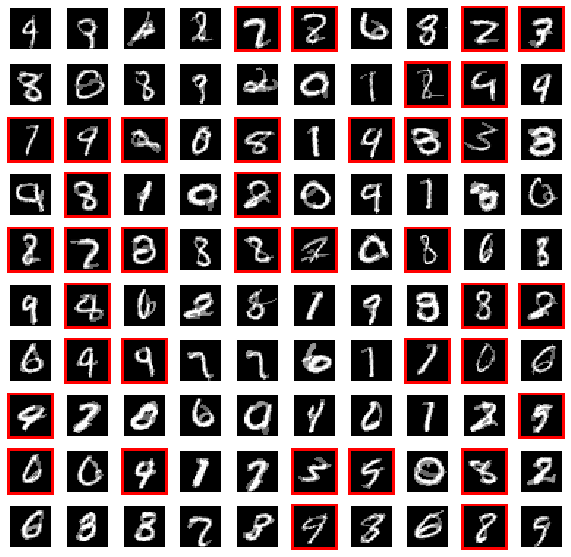

In [6]:
# get the invariance examples from the automated linf attack with epsilon=0.4

# the invariance examples and the human-assigned labels
adv_04 = np.load('invariance_examples/linf/automated_eps04.npy').astype(np.float32) / 255.0
labels_h_04 = np.load('invariance_examples/linf/automated_eps04_labels.npy')

# the original test labels
labels_04 = y_test_r

labels_04 = np.asarray(labels_04)
labels_h_04 = np.asarray(labels_h_04)
print("Attack success rate on humans: {:.1f}%".format(np.mean(labels_04 != labels_h_04) * 100))
print("Max distortion: {:.1f}".format(np.max(np.abs(adv_04 - x_test_r))))

_, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    temp = 255*np.ones((32, 32, 3), dtype=np.float32)
    temp[2:-2, 2:-2, 0] = adv_04[i] * 255
    temp[2:-2, 2:-2, 1] = adv_04[i] * 255
    temp[2:-2, 2:-2, 2] = adv_04[i] * 255
    if labels_04[i] != labels_h_04[i]:
        temp[:2, :] = np.asarray([255, 0, 0])
        temp[-2:, :] = np.asarray([255, 0, 0])
        temp[:, :2] = np.asarray([255, 0, 0])
        temp[:, -2:] = np.asarray([255, 0, 0])
    ax[i//10, i%10].imshow(temp.astype(np.uint8))
    ax[i//10, i%10].axis('off')

plt.show()

Attack success rate on humans: 88.0%
Max distortion: 0.4


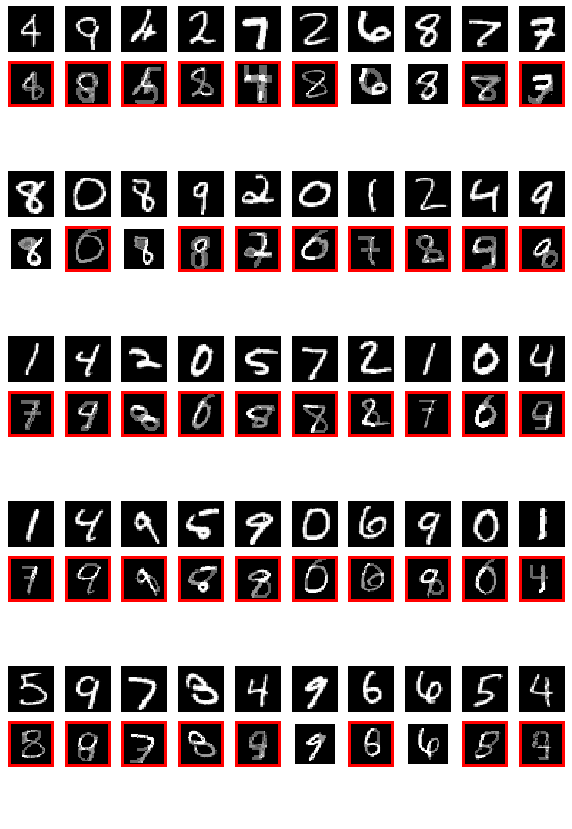

In [7]:
# get the invariance examples from the manual linf attack with epsilon=0.4

# we used different indexes here (for no reason other than we had already generated examples for the 
# first 25 MNIST digits before decising on a random split).
idxs_m = np.load("invariance_examples/linf/manual_indexs.npy")

# load the original examples
x_test_m = x_test[idxs_m]
y_test_m = y_test[idxs_m]
x_test_m = x_test_m.reshape(x_test_m.shape[0], 28, 28)
x_test_m = x_test_m.astype('float32')
x_test_m /= 255

# the invariance examples and the human-assigned labels
adv_m_04 = np.load('invariance_examples/linf/manual_eps04.npy').astype(np.float32) / 255.0
labels_m_h_04 = np.load('invariance_examples/linf/manual_eps04_labels.npy')

# the original test labels
labels_m_04 = y_test_m

labels_m_04 = np.asarray(labels_m_04)
labels_m_h_04 = np.asarray(labels_m_h_04)
print("Attack success rate on humans: {:.1f}%".format(np.mean(labels_m_04 != labels_m_h_04) * 100))
print("Max distortion: {:.1f}".format(np.max(np.abs(adv_m_04 - x_test_m))))

_, ax = plt.subplots(15, 10, figsize=(10, 15))
for i in range(50):
    temp = 255*np.ones((32, 32, 3), dtype=np.float32)
    temp[2:-2, 2:-2, 0] = adv_m_04[i] * 255
    temp[2:-2, 2:-2, 1] = adv_m_04[i] * 255
    temp[2:-2, 2:-2, 2] = adv_m_04[i] * 255
    if labels_m_04[i] != labels_m_h_04[i]:
        temp[:2, :] = np.asarray([255, 0, 0])
        temp[-2:, :] = np.asarray([255, 0, 0])
        temp[:, :2] = np.asarray([255, 0, 0])
        temp[:, -2:] = np.asarray([255, 0, 0])
    
    ax[3*(i//10), i%10].imshow((x_test_m[i]*255).astype(np.uint8), cmap='gray')
    ax[3*(i//10), i%10].axis('off')
    
    ax[3*(i//10)+1, i%10].imshow(temp.astype(np.uint8))
    ax[3*(i//10)+1, i%10].axis('off')
    
    ax[3*(i//10)+2, i%10].axis('off')

plt.show()

Attack success rate on humans: 55.0%
Median distortion: 25.0


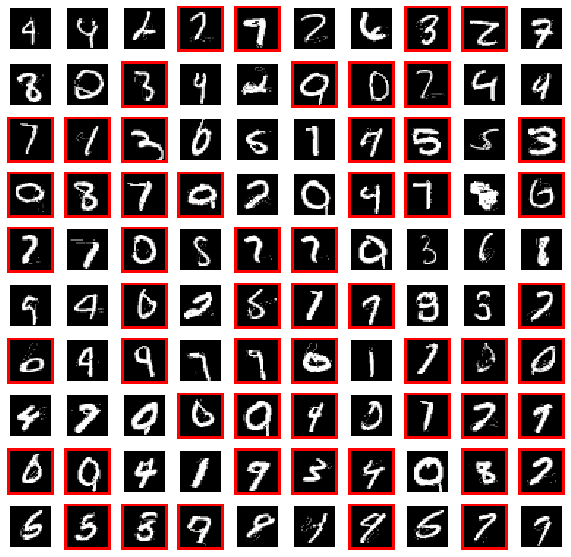

In [11]:
# get the invariance examples from the automated l0 attack

adv_l0 = np.load('invariance_examples/l0/automated.npy').astype(np.float32) / 255.0
labels_h_l0 = np.load('invariance_examples/l0/automated_labels.npy')
labels_l0 = y_test_r

labels_l0 = np.asarray(labels_l0)
labels_h_l0 = np.asarray(labels_h_l0)
print("Attack success rate on humans: {:.1f}%".format(np.mean(labels_l0 != labels_h_l0) * 100))

l0 = np.sum((adv_l0 > .5) ^ (x_test_r > .5), axis=(1, 2))
print("Median distortion: {:.1f}".format(np.median(l0)))

_, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    temp = 255*np.ones((32, 32, 3), dtype=np.float32)
    temp[2:-2, 2:-2, 0] = adv_l0[i]*255
    temp[2:-2, 2:-2, 1] = adv_l0[i]*255
    temp[2:-2, 2:-2, 2] = adv_l0[i]*255
    if labels_l0[i] != labels_h_l0[i]:
        temp[:2, :] = np.asarray([255, 0, 0])
        temp[-2:, :] = np.asarray([255, 0, 0])
        temp[:, :2] = np.asarray([255, 0, 0])
        temp[:, -2:] = np.asarray([255, 0, 0])
    ax[i//10, i%10].imshow(temp.astype(np.uint8))
    ax[i//10, i%10].axis('off')